# Problem Statement

- To predict the <b>Customer lifetime value</b> for an auto insurance company based on different quantitative and qualitative features provided.
- The value a customer contributes to your business over the entire lifetime at your company. It is a very important metric and is used while making important decisions about sales, marketing, product development, and customer support. 

# Problem Description 

Our client is a major non-life insurance company that wants to evaluate customer life time value based on each customer's demographics and policy information including claim details. The CLV is a profitablity metric the organization has set in terms of a value placed by the company on each customer and can be conceived in two dimensions: the customer`s present Value and potential future Value.

It is important for the company to take an optimal decision and implement appropriate action plans. They will be able to do this by accurately predicting the CLV of its customers.

An analytical and modelling framework to predict the life time value of each customer is designed.Various statistical and machine learning models were applied to predict the CLV. This is based on the quantitative and qualitative features provided in the dataset.

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize']=[10,8] #setting fig size of plt
pd.options.display.float_format = '{:.2f}'.format #setting display option to display upto two decimals
pd.options.display.max_rows=25 #setting max rows to be displayed
pd.options.display.max_columns=25 #setting max columns to be displayed

In [3]:
train_df =pd.read_csv('train-1574429526318.csv' ,na_values=['?','',np.nan]) #Reading ? and " " as NA's
test_df =pd.read_csv('test-1574429501088.csv' ,na_values=['?','',np.nan])

In [4]:
def summary(data):  # function to understand data
    print('Shape of the data : ' ,data.shape)
    return( pd.DataFrame({ 'Dtypes':data.dtypes , 
                            'NAs' : data.isnull().sum(),
                            'Uniques': data.nunique(),
                            "levels":[data[x].unique() for x in data.columns]}))

In [5]:
summary(train_df)

Shape of the data :  (9806, 22)


,Dtypes,NAs,Uniques,levels
CustomerID,int64,0,9806,"[5917, 2057, 4119, 1801, 9618, 2747, 3633, 385..."
Customer.Lifetime.Value,float64,0,6477,"[7824.372789, 8005.964669, 8646.504109, 9294.0..."
Coverage,object,925,3,"[Basic, Extended, nan, Premium]"
Education,object,129,5,"[Bachelor, College, High School or Below, Doct..."
EmploymentStatus,object,118,5,"[Unemployed, Employed, Retired, Medical Leave,..."
Gender,object,129,2,"[F, M, nan]"
Income,float64,118,4621,"[0.0, 63357.0, 64125.0, 67544.0, 19651.0, 2358..."
Location.Geo,object,0,2840,"[17.7,77.7, 28.8,76.6, 21.6,88.4, 19,72.5, 19...."
Location.Code,object,119,3,"[Urban, Suburban, Rural, nan]"
Marital.Status,object,129,3,"[Married, Divorced, Single, nan]"


In [6]:
summary(test_df)

Shape of the data :  (1767, 21)


,Dtypes,NAs,Uniques,levels
CustomerID,int64,0,1767,"[17, 19, 29, 34, 37, 44, 48, 49, 54, 65, 77, 8..."
Coverage,object,0,3,"[Basic, Extended, Premium]"
Education,object,0,5,"[Bachelor, College, Master, High School or Bel..."
EmploymentStatus,object,0,4,"[Employed, Disabled, Medical Leave, Unemployed]"
Gender,object,0,2,"[M, F]"
Income,float64,239,1219,"[43836.0, 28812.0, 77026.0, 24599.0, 13789.0, ..."
Location.Geo,object,0,1192,"[12.6,79.4, 17.3,78.4, 18.4,73.5, 17.1,78.2, 1..."
Location.Code,object,0,3,"[Rural, Urban, Suburban]"
Marital.Status,object,0,3,"[Single, Married, Divorced]"
Monthly.Premium.Auto,float64,72,142,"[73.0, 93.0, 110.0, 64.0, 79.0, 71.0, 72.0, 11..."


- There are 22 columns and Customer.Lifetime.Value is the target variable.
- many columns have Na values

In [7]:
#Saving train_df and test_df for backup
train = train_df.copy()
test = test_df.copy()

In [8]:
# Function to plot Each feature based on its Datatype
def plot_feature(feature ):
    type=train[feature].dtypes
    # Distplot for numeric variables 
    if (type in ['int64','float64']):
        fig ,(ax1,ax2)=plt.subplots(1,2 , figsize=(12,9))
        sns.distplot(train[feature] , ax=ax1)
        sns.distplot(np.log(train[feature]) , ax=ax2)
        ax1.set_title( feature , fontsize=16)
        ax2.set_title( 'Log '+feature , fontsize=16)
    else:# boxplot for categorical variable 
        plt.figure(figsize=(10,8))
        sns.boxplot(x=feature , y='customer_lifetime_value' ,data=train  )
        plt.title(feature,fontsize=16)
        plt.xlabel(feature, fontsize=12)
        
        

In [9]:
# Function to get Null values of a variable
def null_values(data,feature):
    print(data[feature].isnull().sum())

In [10]:
#setting columns names appropiate
train_test = [train ,test]
for i in train_test:
    i.columns = [x.lower().replace('.','_') for x in i.columns]

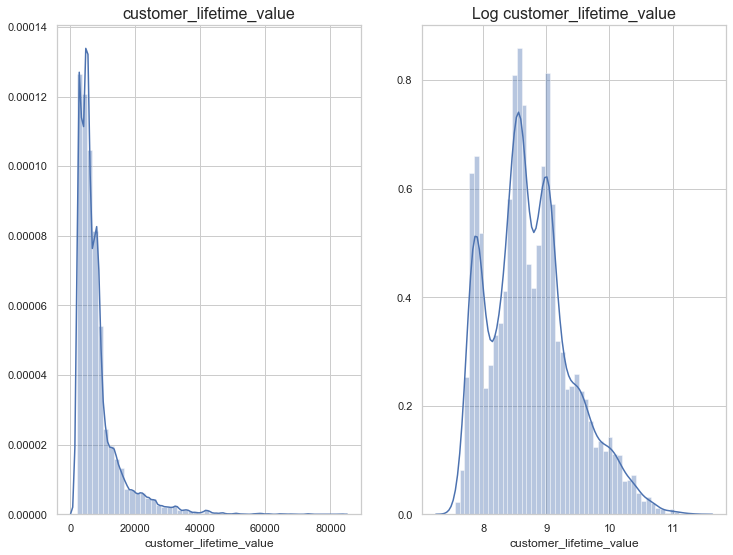

In [11]:
# lets understand the target's distribution
plot_feature('customer_lifetime_value')

- Distribution of y is positively skewwed
- log of Customer.Lifetime.Value is almost normal we could use this for training

In [12]:
print(train.columns)
print(test.columns)

Index(['customerid', 'customer_lifetime_value', 'coverage', 'education',
       'employmentstatus', 'gender', 'income', 'location_geo', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')
Index(['customerid', 'coverage', 'education', 'employmentstatus', 'gender',
       'income', 'location_geo', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')


# Coverage
- Insurance coverage
    - Basic or Extended or Premium

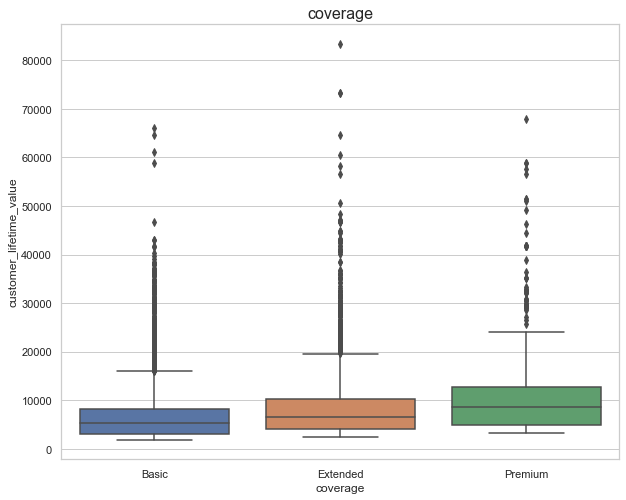

In [13]:
# understanding coverage
plot_feature('coverage')


- premium coverage customers have more lifetime value and than extended coverage then basic
- looks like these are ordina category
- we can use label encoding

In [14]:
train['coverage'].value_counts(dropna=False)

Basic       5361
Extended    2697
NaN          925
Premium      823
Name: coverage, dtype: int64

- there arre more number of basic customers

In [15]:
null_values(train,'coverage')
null_values(test,'coverage')

925
0


- There are 925 missing values. majority of customers has basic coverage.
- lets impute using basic as replacement for NA

In [16]:
train['coverage'].fillna('Basic',inplace=True)

In [17]:
# label encoding(these look like ordinal variables)
cov_dic = { 'Basic':1 , 'Extended':2 , 'Premium':3}
for i in train_test:
    i['coverage']=i['coverage'].map(cov_dic)

# Education
- Education level of customer

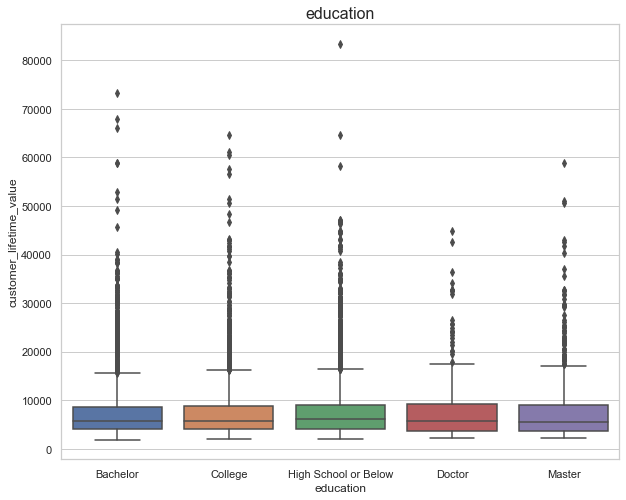

In [18]:
plot_feature('education')

- looks like all levels of education customers have same average customerlifetimevalue

In [19]:
train.education.value_counts(dropna=False)

Bachelor                2934
College                 2836
High School or Below    2796
Master                   759
Doctor                   352
NaN                      129
Name: education, dtype: int64

In [20]:
null_values(train,'education')
null_values(test ,'education')

129
0


In [21]:
train['education'].fillna('Bachelor' , inplace=True)


In [22]:
# change type to category
for i in train_test:
    i['education']=i['education'].astype('str').astype('category')

# Employment Status
- Employment status of customer

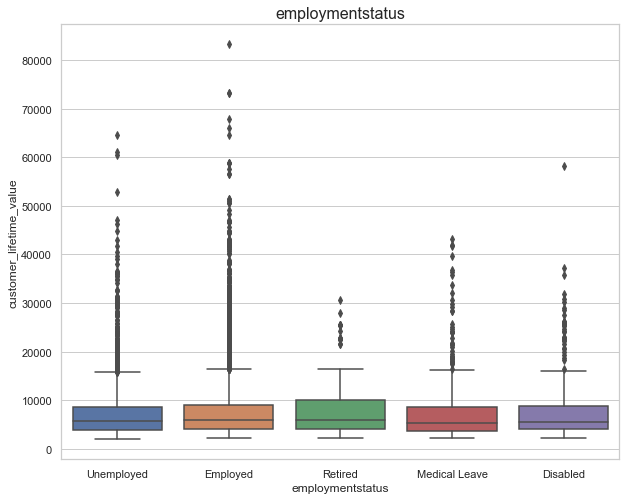

In [23]:
plot_feature('employmentstatus')

- Employed customers and more customerlifetimevalue
- retired customers has less customerlifetimevalue

In [24]:
train['employmentstatus'].value_counts(dropna=False)

Employed         6020
Unemployed       2461
Medical Leave     491
Disabled          429
Retired           287
NaN               118
Name: employmentstatus, dtype: int64

In [25]:
test['employmentstatus'].value_counts(dropna=False)

Employed         1153
Unemployed        471
Disabled           74
Medical Leave      69
Name: employmentstatus, dtype: int64

In [26]:
train['employmentstatus']=train['employmentstatus'].apply(lambda x:'Disabled' if x=='Retired' else x)

In [27]:
train['employmentstatus'].value_counts()

Employed         6020
Unemployed       2461
Disabled          716
Medical Leave     491
Name: employmentstatus, dtype: int64

In [28]:
null_values(train ,'employmentstatus')
null_values(test , 'employmentstatus')

118
0


In [29]:
train['employmentstatus'].fillna('Employed' ,inplace=True)
null_values(train ,'employmentstatus')

0


In [30]:
# converting to category
for i in train_test:
    i['employmentstatus']=i['employmentstatus'].astype('str').astype('category')

# Gender

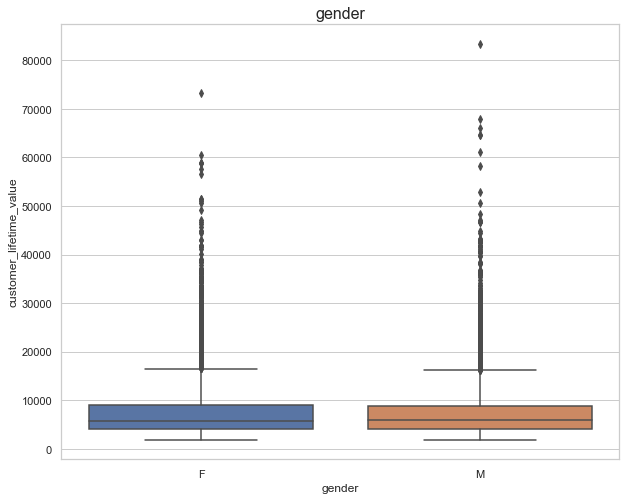

In [31]:
plot_feature('gender')

- Both male and female have almost equal average customerlifetimevalue

In [32]:
train['gender'].value_counts()

F    4985
M    4692
Name: gender, dtype: int64

In [33]:
null_values(train , 'gender')
null_values(test , 'gender')

129
0


In [34]:
train['gender'].fillna("F" , inplace=True) # since female are majority
null_values(train ,'gender')

0


In [35]:
for i in train_test:
    i['gender']=i['gender'].astype('str').astype('category')

# Income

In [36]:
median = train['income'].median()
for i in train_test:
    i['income'].fillna(median , inplace=True)
    i['income']=i['income'].astype('int64')
    i['income']=i['income'].apply(lambda x:median if x==0 else x)

In [37]:
null_values(train,'income')
null_values(test,'income')

0
0


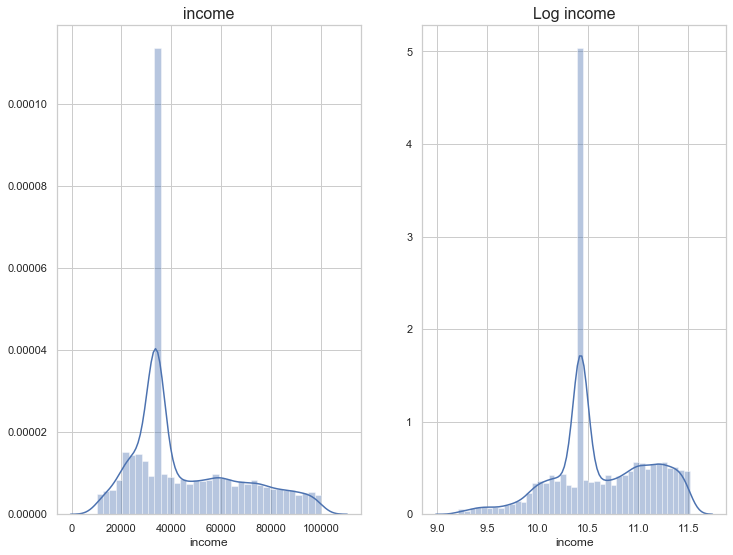

In [38]:
plot_feature('income')

- income distribution is fairly normal with slight positive skew

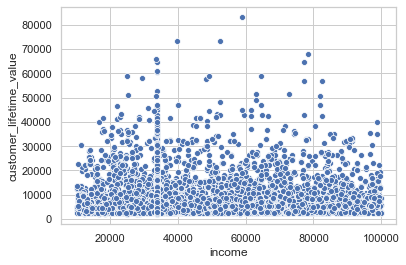

In [39]:
sns.scatterplot(x='income' , y='customer_lifetime_value',data=train)

- looks like there are some outliers. in income range 50000 to 70000. they have high customer lifetime value

In [40]:
df =train.loc[train['customer_lifetime_value']>70000 ,['income','customer_lifetime_value']]
df

,income,customer_lifetime_value
2680,58958.00,83325.38
6806,52499.00,73225.96
7914,39547.00,73225.96


In [41]:
ind =df.index #lets remove this rows

In [42]:
train.drop(ind , inplace=True)

# location_Geo

In [43]:
train['location_geo'].value_counts(dropna=False)

NA,NA        118
19.2,72.4     26
18.9,72.6     26
18.9,72.7     22
17.2,78.5     21
17.2,78.4     20
19.3,72.7     20
19.1,73.1     20
18.9,73.1     20
19.1,72.5     19
19.2,72.5     19
17.6,78.5     19
            ... 
23.3,88.8      1
22.9,90        1
22,86.1        1
28,78          1
18.5,74.5      1
19.2,70.2      1
22.7,89.4      1
17.3,80.2      1
28,78.2        1
22.2,90.1      1
16.7,76.5      1
19.7,75.4      1
Name: location_geo, Length: 2840, dtype: int64

- using this lattitude and longitude we could find distances and bin all the close distances. but for now i am dropping it

In [44]:
def drop_col(feature):
    for i in train_test:
        i.drop(feature ,axis=1, inplace=True)

In [45]:
drop_col('location_geo')

# location.code

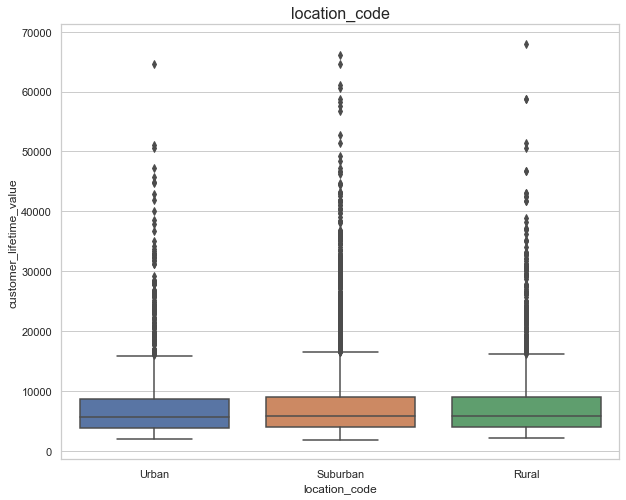

In [46]:
plot_feature('location_code')

- More suburban people looks like to take car insurances and have good lifetimevalues

In [47]:
null_values(train,'location_code')
null_values(test,'location_code')

118
0


In [48]:
train.location_code.value_counts(dropna=False)

Suburban    6202
Rural       1810
Urban       1673
NaN          118
Name: location_code, dtype: int64

In [49]:
train['location_code'].fillna('Suburban' , inplace=True) # since suburban is majority
null_values(train,'location_code')

0


In [50]:
def convert_to_cat(feature):
    for i in train_test:
        i[feature]=i[feature].astype('str').astype('category')

In [51]:
convert_to_cat('location_code')

# Marital_Status

In [52]:
train['marital_status'].value_counts(dropna=False)

Married     5641
Single      2601
Divorced    1433
NaN          128
Name: marital_status, dtype: int64

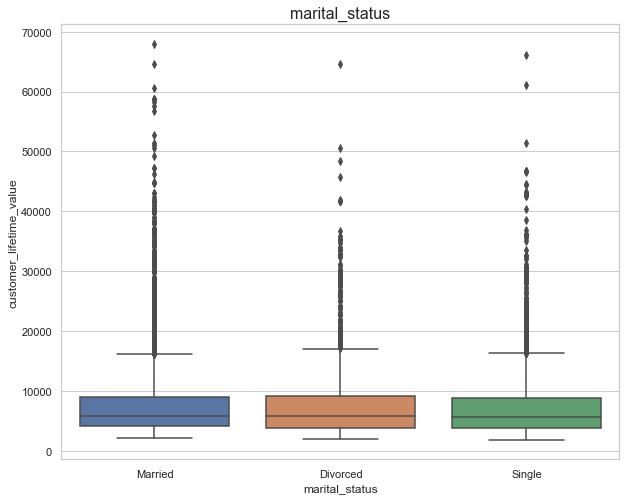

In [53]:
plot_feature('marital_status')

- median of all groups is almost same but apparently more married people take car insurances. 

In [54]:
train['marital_status'].value_counts()

Married     5641
Single      2601
Divorced    1433
Name: marital_status, dtype: int64

In [55]:
null_values(train,'marital_status')

128


In [56]:
train['marital_status'].fillna('Married' , inplace=True) # since married is majority

In [57]:
null_values(train,'marital_status')
null_values(test,'marital_status')

0
0


In [58]:
convert_to_cat('marital_status')

# monthly premium Auto

In [59]:
null_values(train,'monthly_premium_auto')
null_values(test,'monthly_premium_auto')

794
72


In [60]:
train.monthly_premium_auto.median()

83.0

In [61]:
def fill_na(feature , mode=False ,mean=False ,median=False):
    if mode:
        mid = train[feature].mode()
        for i in train_test:
            i[feature].fillna(mid, inplace=True)
    elif mean:
        mid = train[feature].mean()
        for i in train_test:
            i[feature].fillna(mid, inplace=True)
    elif median:
        mid = train[feature].median()
        for i in train_test:
            i[feature].fillna(mid, inplace=True)        

In [62]:
fill_na('monthly_premium_auto' , median=True)

In [63]:
null_values(train,'monthly_premium_auto')
null_values(test,'monthly_premium_auto')

0
0


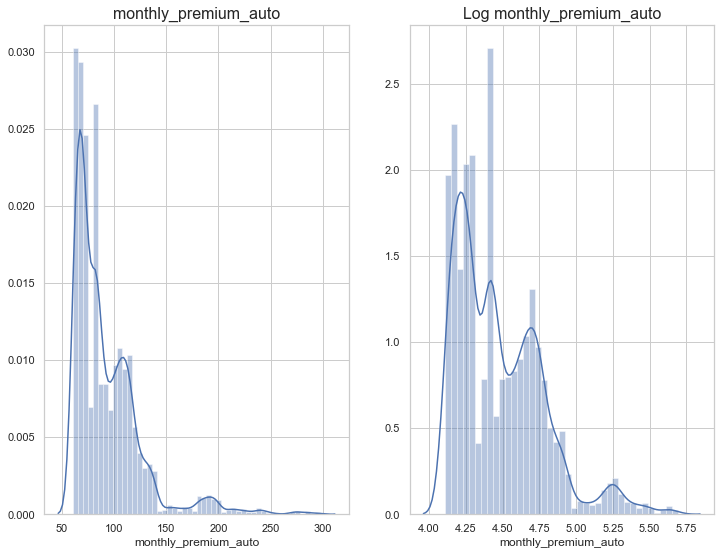

In [64]:
plot_feature('monthly_premium_auto')

- distribution is positive skewed

# months since last claim

In [65]:
train['months_since_last_claim'].value_counts()

3     405
2     388
7     379
6     370
1     356
10    351
4     349
5     335
15    317
16    316
11    313
12    306
     ... 
25    236
24    226
29    222
31    220
26    216
28    208
27    204
33    190
34    181
30    177
35    146
32    137
Name: months_since_last_claim, Length: 36, dtype: int64

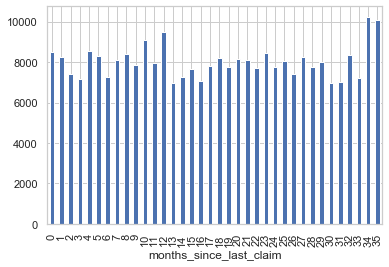

In [66]:
train.groupby('months_since_last_claim')['customer_lifetime_value'].mean().plot(kind='bar')

- 34 and 35 months since last claim customers have more lifetime value.

#  Months.Since.Policy.Inception
- it is the date when the customer paid the first premium

In [67]:
null_values(train,'months_since_policy_inception')

0


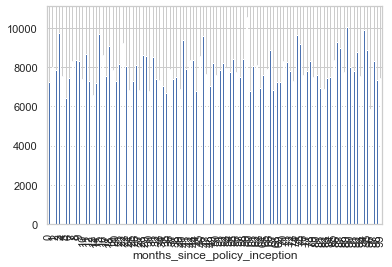

In [68]:
train.groupby('months_since_policy_inception')['customer_lifetime_value'].mean().plot(kind='bar')
plt.show()

- No pattern. model will have hard time if we give this columns as input

In [69]:
drop_col('months_since_policy_inception')

# Number of Open complaints

In [70]:
train.number_of_open_complaints.value_counts()

0.00    7128
1.00    1019
2.00     370
3.00     277
4.00     142
5.00      50
Name: number_of_open_complaints, dtype: int64

In [71]:
null_values(train,'number_of_open_complaints')
null_values(test,'number_of_open_complaints')

817
0


In [72]:
train['number_of_open_complaints'].fillna(0 , inplace=True) # since 0 is majority 

In [73]:
null_values(train,'number_of_open_complaints')
null_values(test,'number_of_open_complaints')

0
0


In [74]:
train['number_of_open_complaints']=train['number_of_open_complaints'].astype('int64')

In [75]:
convert_to_cat('number_of_open_complaints')

In [76]:
train.number_of_open_complaints.dtypes

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5'], ordered=False)

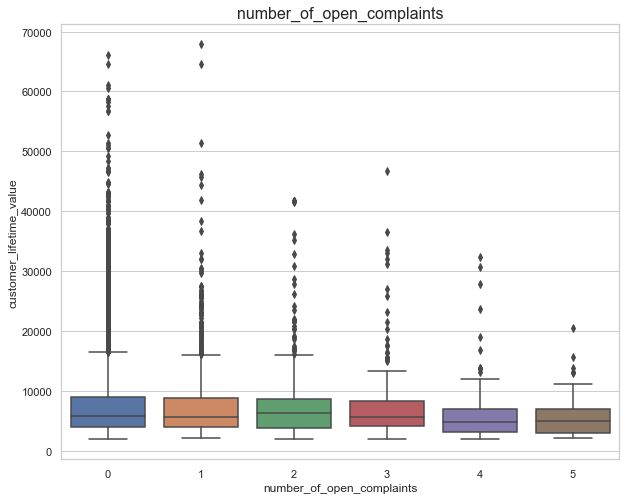

In [77]:
plot_feature('number_of_open_complaints')

- it is clear from the plot that people who complain alot has less customer lifetime value. probably they may churn

# number of policies

In [78]:
train.number_of_policies.value_counts(dropna=False)

1.00    3459
2.00    2431
3.00    1240
7.00     460
9.00     446
5.00     434
4.00     429
8.00     401
6.00     383
nan      120
Name: number_of_policies, dtype: int64

In [79]:
null_values(train,'number_of_policies')
null_values(test,'number_of_policies')


120
0


In [80]:
train['number_of_policies'].fillna(1 , inplace=True) # 1 is majority

In [81]:
train.number_of_policies.value_counts(dropna=False)

1.00    3579
2.00    2431
3.00    1240
7.00     460
9.00     446
5.00     434
4.00     429
8.00     401
6.00     383
Name: number_of_policies, dtype: int64

In [82]:
train['number_of_policies'] = train['number_of_policies'].astype('float64').astype('int64')

In [83]:
convert_to_cat('number_of_policies')

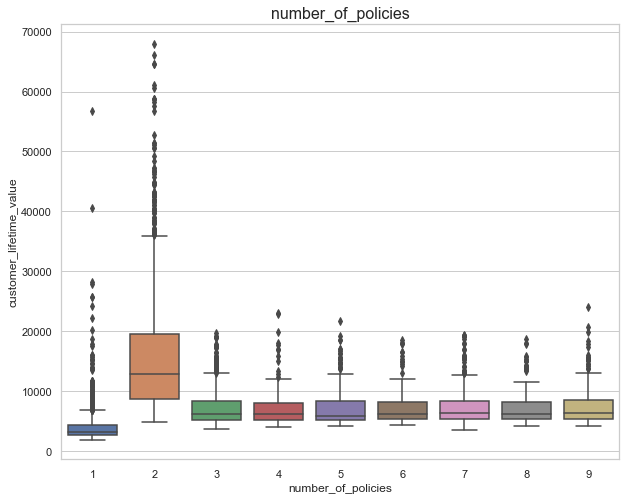

In [84]:
plot_feature('number_of_policies')

- many people with numberof policies=2 have high customerlifetime value

# Policy type

In [85]:
train.policy_type.value_counts(dropna=False)

Personal Auto     6618
Corporate Auto    1920
NaN                890
Special Auto       375
Name: policy_type, dtype: int64

In [86]:
train['policy_type'].fillna('Personal Auto' , inplace=True) # personal policy is majority

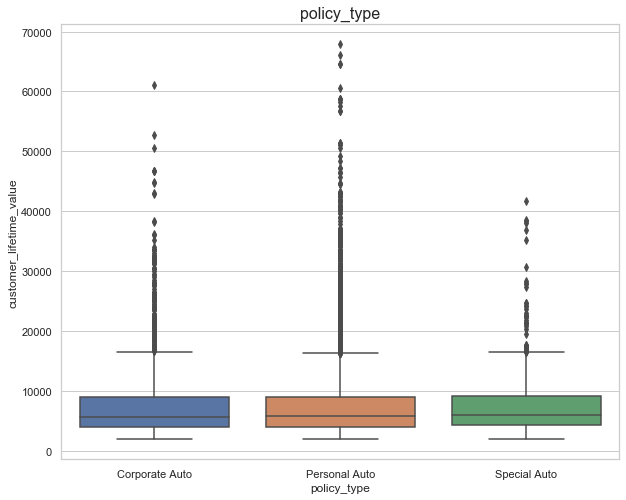

In [87]:
convert_to_cat('policy_type')
plot_feature('policy_type')

- more people tend to tend to buy personal policy.

# Policy

In [88]:
train.policy.value_counts(dropna=False)

Personal L3     3635
Personal L2     2271
Personal L1     1274
Corporate L3    1067
Corporate L2     618
Corporate L1     410
Special L2       189
Special L3       155
NaN              120
Special L1        64
Name: policy, dtype: int64

In [89]:
for i in train_test:
    i['policy_type']=i.policy.str.split(" ",expand=True)[0] # reassigning policy type since less NA here
    i['policy_category']=i.policy.str.split(" ",expand=True)[1]
    i['policy_type'].fillna('Personal' , inplace=True) # since personal is majority
    i['policy_category'].fillna('L3' , inplace=True)  # since L3 is majority

In [90]:
drop_col('policy')

In [91]:
convert_to_cat('policy_type')
convert_to_cat('policy_category')

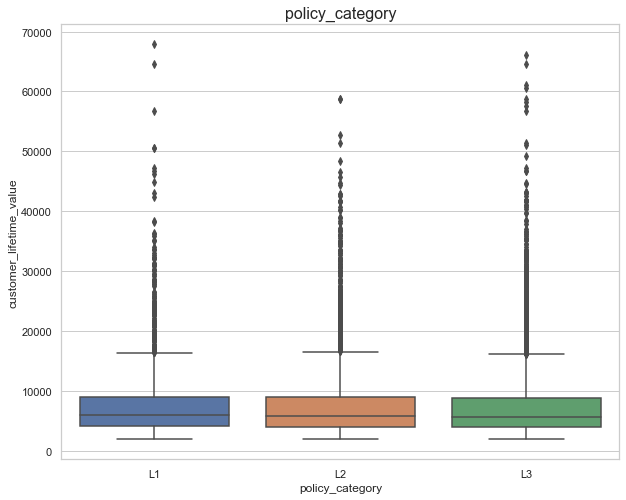

In [92]:
plot_feature('policy_category')

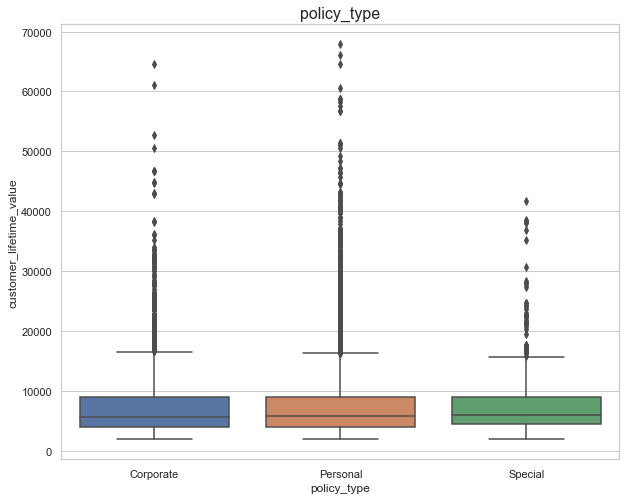

In [93]:
plot_feature('policy_type')

# Renew offer type 

In [94]:
train.renew_offer_type.value_counts(dropna=False)

Offer1    3972
Offer2    3084
Offer3    1540
Offer4    1079
NaN        128
Name: renew_offer_type, dtype: int64

In [95]:
null_values(train,'renew_offer_type')
null_values(test,'renew_offer_type')

128
0


In [96]:
train['renew_offer_type'].fillna('Offer1' , inplace=True) # since Offer 1 is majority

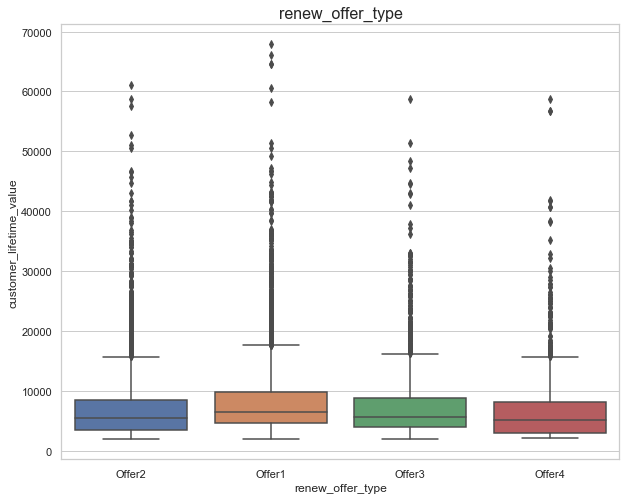

In [97]:
plot_feature('renew_offer_type')

- Offer1 seems to get highlifetime value customers

In [98]:
convert_to_cat('renew_offer_type')

# Sales channel

In [99]:
train.sales_channel.value_counts(dropna=False)

Agent          3670
Branch         2756
Call Center    1860
Web            1389
NaN             128
Name: sales_channel, dtype: int64

In [100]:
null_values(train ,'sales_channel')
null_values(test ,'sales_channel')

128
0


In [101]:
train['sales_channel'].fillna('Agent' , inplace=True)

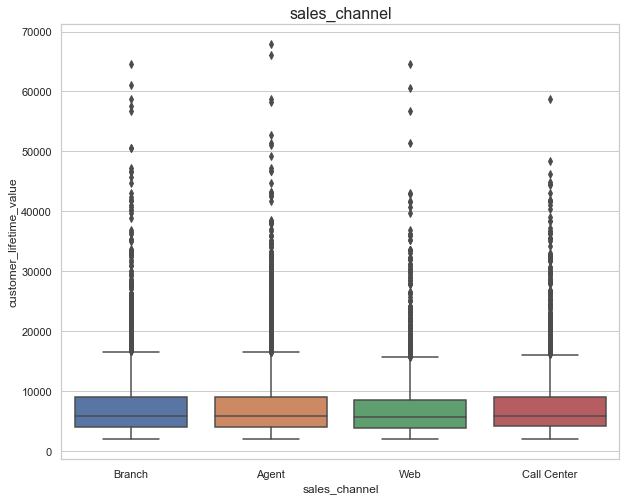

In [102]:
plot_feature('sales_channel')

- More people buys insurace policies through Agent channel.

In [103]:
convert_to_cat('sales_channel')

# Total claim amount

In [104]:
train.total_claim_amount.describe()

count   9803.00
mean     438.08
std      293.35
min        0.10
25%      280.20
50%      384.00
75%      553.28
max     2893.24
Name: total_claim_amount, dtype: float64

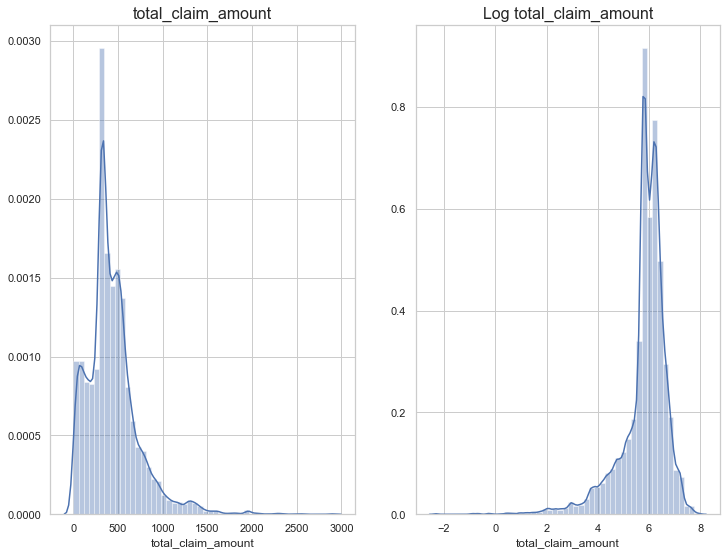

In [105]:
plot_feature('total_claim_amount')

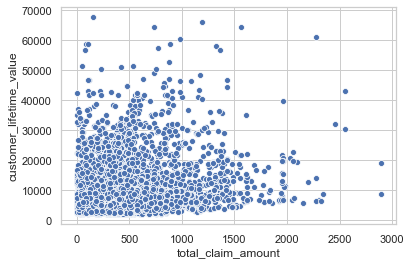

In [106]:
sns.scatterplot(x='total_claim_amount' , y='customer_lifetime_value',data=train)

- people who claim more amount has less lifetime value

# vehicle class

In [107]:
train.vehicle_class.value_counts(dropna=False)

Four-Door Car    4869
Two-Door Car     2025
SUV              1899
Sports Car        517
Luxury SUV        184
Luxury Car        183
NaN               126
Name: vehicle_class, dtype: int64

In [108]:
null_values(train,'vehicle_class')
null_values(test , 'vehicle_class')

126
0


In [109]:
train['vehicle_class'].fillna('Four-Door Car',inplace=True) # since four_door class is majority

In [110]:
train.vehicle_class.value_counts(dropna=False)

Four-Door Car    4995
Two-Door Car     2025
SUV              1899
Sports Car        517
Luxury SUV        184
Luxury Car        183
Name: vehicle_class, dtype: int64

- More people buy insurance for four_door cars and two door cars

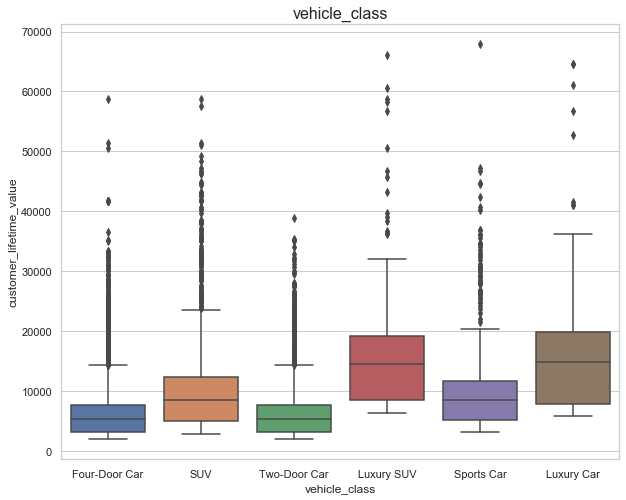

In [111]:
plot_feature('vehicle_class')

- people who buy luxury car or luxury Suv have more lifetimevalue than others. but very less people can afford such cars

In [112]:
convert_to_cat('vehicle_class')

# vehicle size

In [113]:
train.vehicle_size.value_counts(dropna=False)

2.00    6794
3.00    1875
1.00    1008
nan      126
Name: vehicle_size, dtype: int64

In [114]:
null_values(train , 'vehicle_size')
null_values(test, 'vehicle_size')

126
0


In [115]:
train['vehicle_size'].fillna(2 , inplace=True) # since 2 is majority

In [116]:
null_values(train , 'vehicle_size')
null_values(test, 'vehicle_size')

0
0


In [117]:
train['vehicle_size']=train['vehicle_size'].astype('float64').astype('int64')

In [118]:
for i in train_test:
    i['vehicle_size']=i['vehicle_size'].astype('category')
    

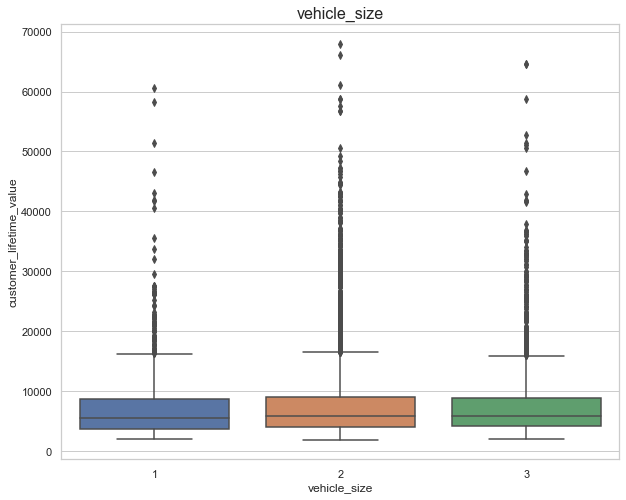

In [119]:
plot_feature('vehicle_size')

In [120]:
test.vehicle_size.value_counts()

Medsize    1252
Small       343
Large       172
Name: vehicle_size, dtype: int64

In [121]:
size = { 'Small':1 , 'Medsize':2 , 'Large':3}
test['vehicle_size']=test['vehicle_size'].map(size) #to match with train vehicle size values

In [122]:
test.vehicle_size.value_counts()

2    1252
1     343
3     172
Name: vehicle_size, dtype: int64

In [123]:
convert_to_cat('vehicle_size')

- checking for allignment issues

In [124]:
train.columns.difference(test.columns)

Index(['customer_lifetime_value'], dtype='object')

In [125]:
summary(test)

Shape of the data :  (1767, 19)


,Dtypes,NAs,Uniques,levels
customerid,int64,0,1767,"[17, 19, 29, 34, 37, 44, 48, 49, 54, 65, 77, 8..."
coverage,int64,0,3,"[1, 2, 3]"
education,category,0,5,"[Bachelor, College, Master, High School or Bel..."
employmentstatus,category,0,4,"[Employed, Disabled, Medical Leave, Unemployed..."
gender,category,0,2,"[M, F] Categories (2, object): [M, F]"
income,float64,0,1220,"[43836.0, 28812.0, 77026.0, 24599.0, 13789.0, ..."
location_code,category,0,3,"[Rural, Urban, Suburban] Categories (3, object..."
marital_status,category,0,3,"[Single, Married, Divorced] Categories (3, obj..."
monthly_premium_auto,float64,0,142,"[73.0, 93.0, 110.0, 64.0, 79.0, 71.0, 72.0, 11..."
months_since_last_claim,int64,0,36,"[12, 17, 9, 8, 13, 22, 15, 1, 19, 7, 11, 4, 29..."


In [126]:
summary(train)

Shape of the data :  (9803, 20)


,Dtypes,NAs,Uniques,levels
customerid,int64,0,9803,"[5917, 2057, 4119, 1801, 9618, 2747, 3633, 385..."
customer_lifetime_value,float64,0,6475,"[7824.372789, 8005.964669, 8646.504109, 9294.0..."
coverage,int64,0,3,"[1, 2, 3]"
education,category,0,5,"[Bachelor, College, High School or Below, Doct..."
employmentstatus,category,0,4,"[Unemployed, Employed, Disabled, Medical Leave..."
gender,category,0,2,"[F, M] Categories (2, object): [F, M]"
income,float64,0,4621,"[33767.5, 63357.0, 64125.0, 67544.0, 19651.0, ..."
location_code,category,0,3,"[Urban, Suburban, Rural] Categories (3, object..."
marital_status,category,0,3,"[Married, Divorced, Single] Categories (3, obj..."
monthly_premium_auto,float64,0,190,"[67.0, 101.0, 108.0, 116.0, 72.0, 211.0, 90.0,..."


In [127]:
# lets do one hot encoding for all the categorical columns
train_dum = pd.get_dummies(train)
test_dum = pd.get_dummies(test)

In [128]:
train_dum.shape

(9803, 62)

In [129]:
test_dum.shape

(1767, 61)

In [130]:
train_dum.columns.difference(test_dum.columns)

Index(['customer_lifetime_value'], dtype='object')

- No allignment issue we can start splitting and model building

In [131]:
# importing packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error ,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR

In [132]:
x = train_dum.drop('customer_lifetime_value',axis=1)
y = train['customer_lifetime_value']

In [133]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [134]:
def model_builder(model):
    m = model
    m.fit(xtrain,np.log(ytrain)) # log(y) follows normal distribution
    train_pred =np.exp(m.predict(xtrain))
    test_pred = np.exp(m.predict(xtest))
    print('========Train=======')
    print('RMSE :' ,np.sqrt(mean_squared_error(ytrain,train_pred)))
    print('MAPE :' , np.mean(np.abs((ytrain-train_pred)/ytrain))*100)
    print('========Test=======')
    print('RMSE :' ,np.sqrt(mean_squared_error(ytest,test_pred)))
    print('MAPE :' , np.mean(np.abs((ytest-test_pred)/ytest))*100)
    return m
    

In [135]:
lr = model_builder(LinearRegression())

========Train=======
RMSE : 4025.380878305506
MAPE : 13.739244330284109
========Test=======
RMSE : 3984.2213489490946
MAPE : 14.07444135321366


In [136]:
params ={'max_depth':range(1,15), 'min_samples_split':range(10,70,10)}
 
dt = model_builder(GridSearchCV(DecisionTreeRegressor( ) , param_grid=params , cv=5 , n_jobs=-1))

========Train=======
RMSE : 3739.861778380564
MAPE : 11.900721981064232
========Test=======
RMSE : 4072.809048092456
MAPE : 13.239295748209187


In [137]:
params = {'n_estimators':range(50,200,50),'max_depth': range(1,10) }
rf = model_builder(GridSearchCV(RandomForestRegressor() , param_grid = params , cv=5 , n_jobs=-1))

========Train=======
RMSE : 3112.838731056395
MAPE : 9.400809278132675
========Test=======
RMSE : 3915.9129407961645
MAPE : 11.97251015696225


In [138]:
rf.best_params_

{'max_depth': 9, 'n_estimators': 150}

In [139]:
rf1= model_builder(RandomForestRegressor(max_depth=9 , n_estimators=150 , min_samples_split=60))

========Train=======
RMSE : 3661.8230264983717
MAPE : 10.968673070078026
========Test=======
RMSE : 3887.7510622219643
MAPE : 12.146875202053018


In [140]:
params = {'n_estimators':range(50,200,50),'learning_rate':[0.5,0.7,1.0]}
ad = model_builder(GridSearchCV(AdaBoostRegressor() , param_grid=params , cv=5 ,n_jobs=-1))

========Train=======
RMSE : 4097.981141201624
MAPE : 30.89447366404272
========Test=======
RMSE : 4130.100702443528
MAPE : 31.755667868963595


In [141]:
gb = model_builder(GradientBoostingRegressor(n_estimators=50 , learning_rate=0.1))

========Train=======
RMSE : 3909.302838577513
MAPE : 12.396560627480685
========Test=======
RMSE : 3921.9798846808053
MAPE : 12.767224371521019


In [142]:
import warnings
warnings.filterwarnings('ignore')
params = { "max_depth":[3,5,7,10] , "n_estimators":range(50,200,50)}
xg = model_builder(GridSearchCV(XGBRegressor() ,param_grid=params , cv=5 , n_jobs=-1))

[12:10:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========Train=======
RMSE : 3026.203747515236
MAPE : 9.19331246209695
========Test=======
RMSE : 3808.9315957659983
MAPE : 11.842065976125948


In [143]:
# lets use xgboost to make base prediction
pred = pd.read_csv('sample_submission-1577482703002.csv')
pred.head()

,CustomerID,Customer.Lifetime.Value
0,17,0
1,19,0
2,29,0
3,34,0
4,37,0


In [144]:
test_prediction = np.exp(rf.predict(test_dum))

In [145]:
pred['Customer.Lifetime.Value']=test_prediction

In [146]:
pred.head()

,CustomerID,Customer.Lifetime.Value
0,17,3172.19
1,19,7173.94
2,29,8707.74
3,34,9343.30
4,37,3164.35


In [147]:
pred.to_csv('final_submission.csv',index=False)

# Segmenting customers in to clusters

In [148]:
from kmodes.kprototypes import KPrototypes

In [154]:
df = train.drop(['customerid','customer_lifetime_value'],axis=1)
df.head()

,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,policy_category
0,1,Bachelor,Unemployed,F,33767.50,Urban,Married,67.00,2,0,2,Personal,Offer2,Branch,267.21,Four-Door Car,2,L2
1,1,College,Employed,M,63357.00,Suburban,Married,101.00,26,0,5,Personal,Offer2,Agent,565.51,SUV,2,L2
2,1,High School or Below,Employed,F,64125.00,Urban,Married,108.00,3,0,3,Personal,Offer2,Branch,369.82,SUV,1,L1
3,1,College,Employed,M,67544.00,Suburban,Married,116.00,2,0,3,Corporate,Offer1,Branch,556.80,SUV,3,L3
4,1,Bachelor,Disabled,F,19651.00,Suburban,Married,72.00,3,0,5,Personal,Offer2,Web,345.60,Two-Door Car,3,L1


In [159]:
num_cols=df.select_dtypes(['int64','float64']).columns

In [160]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[num_cols] = ss.fit_transform(df[num_cols])

In [162]:
# To get The Index Of categorical variable to give as input to Kprototypes
df.dtypes

coverage                      float64
education                    category
employmentstatus             category
gender                       category
income                        float64
location_code                category
marital_status               category
monthly_premium_auto          float64
months_since_last_claim       float64
number_of_open_complaints    category
number_of_policies           category
policy_type                  category
renew_offer_type             category
sales_channel                category
total_claim_amount            float64
vehicle_class                category
vehicle_size                 category
policy_category              category
dtype: object

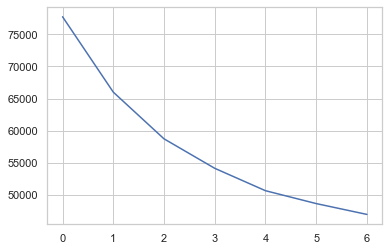

In [163]:
cost=[]
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(df, categorical=[1,2,3,5,6,9,10,11,12,13,15,16,17])
    cost.append(kproto.cost_)

plt.plot(cost)

In [164]:
kproto = KPrototypes(n_clusters=6, init='Cao')
clusters = kproto.fit_predict(df ,  categorical=[1,2,3,5,6,9,10,11,12,13,15,16,17])

In [165]:
clusters

array([4, 5, 2, ..., 2, 2, 1], dtype=uint16)

In [166]:
train['cluster'] = clusters

In [167]:
train['cluster'] = train['cluster'].astype('category')

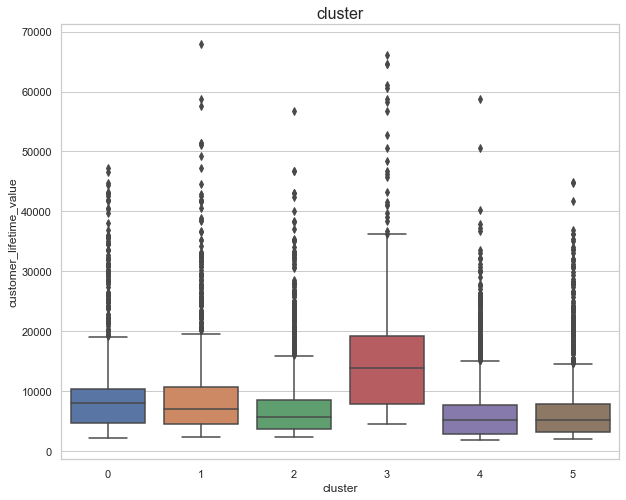

In [168]:
plot_feature('cluster')

- cluster 3 customers have more customer_life time_value.
- cluster 4 apparently has more unsatisfied customers
- we can use this to provide some offers to unsatisfied customer and increase revenue

In [170]:
#cluster 3 customers
train.loc[train['cluster']==3, :]

,customerid,customer_lifetime_value,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,policy_category,cluster
5,2747,16570.09,2,Bachelor,Employed,M,23589.00,Suburban,Married,211.00,30,0,6,Special,Offer2,Agent,1012.80,Luxury SUV,3,L2,3
30,3587,7126.60,1,College,Medical Leave,M,17483.00,Suburban,Married,183.00,24,0,1,Personal,Offer2,Web,1317.60,Luxury Car,1,L1,3
59,11234,7180.97,1,College,Employed,F,42303.00,Suburban,Married,180.00,24,0,1,Personal,Offer2,Agent,1210.92,Luxury SUV,2,L2,3
84,10926,23984.62,3,Doctor,Employed,F,79655.00,Rural,Married,296.00,12,0,9,Personal,Offer2,Branch,498.16,Luxury Car,2,L3,3
115,5406,18089.80,1,Master,Employed,F,68568.00,Suburban,Married,223.00,5,1,6,Personal,Offer4,Branch,1070.40,Luxury Car,2,L3,3
129,5973,6021.84,3,High School or Below,Unemployed,F,33767.50,Suburban,Single,168.00,11,0,1,Personal,Offer1,Agent,1476.67,SUV,2,L3,3
132,7529,11009.13,3,High School or Below,Employed,M,56855.00,Suburban,Single,276.00,17,0,1,Corporate,Offer1,Agent,1358.40,Luxury Car,2,L1,3
174,10412,8283.07,2,College,Disabled,M,20545.00,Suburban,Married,239.00,29,1,1,Personal,Offer1,Call Center,1065.60,Luxury Car,2,L3,3
251,4918,10978.78,2,Bachelor,Employed,F,92914.00,Suburban,Married,136.00,24,0,8,Personal,Offer1,Agent,979.20,Sports Car,1,L1,3
253,6695,15470.60,1,College,Employed,M,51675.00,Suburban,Married,197.00,15,0,9,Corporate,Offer1,Agent,1367.20,Luxury Car,3,L2,3


In [171]:
# cluster 1 customers
train.loc[train['cluster']==1, :]

,customerid,customer_lifetime_value,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,policy_category,cluster
7,3856,11154.68,2,Doctor,Employed,F,31409.00,Urban,Married,93.00,10,0,2,Personal,Offer1,Branch,381.96,Four-Door Car,2,L3,1
18,4915,8500.12,3,College,Employed,M,88895.00,Suburban,Single,108.00,24,0,8,Corporate,Offer1,Call Center,532.80,Four-Door Car,2,L3,1
22,9402,20120.56,3,Bachelor,Employed,M,84488.00,Rural,Married,182.00,27,0,2,Corporate,Offer1,Agent,260.63,SUV,3,L2,1
24,4233,7664.81,3,High School or Below,Unemployed,M,33767.50,Suburban,Single,107.00,14,0,3,Personal,Offer1,Agent,770.40,Four-Door Car,2,L3,1
34,4979,9706.38,2,College,Employed,F,23649.00,Urban,Married,122.00,2,0,6,Personal,Offer1,Branch,535.61,SUV,1,L3,1
35,3993,17530.04,2,College,Unemployed,M,33767.50,Suburban,Divorced,128.00,6,0,2,Corporate,Offer1,Branch,595.20,SUV,2,L2,1
36,5465,10209.93,2,High School or Below,Employed,M,43736.00,Suburban,Married,128.00,0,0,3,Personal,Offer1,Branch,614.40,SUV,2,L1,1
37,6613,10248.90,2,College,Employed,M,52693.00,Suburban,Married,129.00,1,0,5,Personal,Offer1,Branch,619.20,SUV,2,L2,1
43,4150,4150.84,3,High School or Below,Employed,F,53787.00,Suburban,Married,104.00,20,0,1,Corporate,Offer1,Agent,666.09,Four-Door Car,2,L2,1
46,8527,7559.21,3,College,Unemployed,M,33767.50,Suburban,Single,119.00,33,1,3,Corporate,Offer1,Call Center,964.52,Four-Door Car,3,L3,1


In [172]:
# cluster 2 customers
train.loc[train['cluster']==2, :]

,customerid,customer_lifetime_value,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,policy_category,cluster
2,4119,8646.50,1,High School or Below,Employed,F,64125.00,Urban,Married,108.00,3,0,3,Personal,Offer2,Branch,369.82,SUV,1,L1,2
6,3633,3653.70,2,College,Employed,F,74126.00,Suburban,Married,90.00,14,0,1,Corporate,Offer2,Call Center,478.75,Two-Door Car,2,L3,2
14,2962,12694.89,1,High School or Below,Employed,F,73274.00,Urban,Married,105.00,6,0,2,Corporate,Offer3,Branch,284.21,SUV,2,L3,2
15,901,5714.56,1,Bachelor,Employed,F,74905.00,Rural,Single,72.00,16,0,3,Personal,Offer1,Call Center,167.03,Four-Door Car,2,L3,2
27,5705,5439.80,1,High School or Below,Employed,M,61546.00,Rural,Married,68.00,4,0,3,Corporate,Offer4,Call Center,29.21,Two-Door Car,1,L2,2
39,8850,2582.41,1,Bachelor,Employed,F,76731.00,Urban,Married,64.00,2,0,1,Personal,Offer2,Agent,201.46,Four-Door Car,2,L3,2
44,2248,8405.75,1,High School or Below,Employed,M,85355.00,Suburban,Married,71.00,34,2,2,Personal,Offer2,Call Center,458.57,Two-Door Car,3,L2,2
45,39,4327.10,1,High School or Below,Employed,M,69040.00,Suburban,Married,108.00,4,0,1,Corporate,Offer1,Call Center,518.40,Sports Car,3,L3,2
49,10807,7462.93,2,College,Employed,F,70263.00,Rural,Married,93.00,30,0,5,Personal,Offer2,Call Center,7.35,Two-Door Car,3,L1,2
51,4717,2489.34,1,Bachelor,Employed,F,68041.00,Suburban,Married,63.00,6,5,1,Personal,Offer3,Branch,292.80,Two-Door Car,3,L3,2


In [173]:
# cluster 4 customers
train.loc[train['cluster']==4, :]

,customerid,customer_lifetime_value,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,policy_category,cluster
0,5917,7824.37,1,Bachelor,Unemployed,F,33767.50,Urban,Married,67.00,2,0,2,Personal,Offer2,Branch,267.21,Four-Door Car,2,L2,4
3,1801,9294.09,1,College,Employed,M,67544.00,Suburban,Married,116.00,2,0,3,Corporate,Offer1,Branch,556.80,SUV,3,L3,4
4,9618,5595.97,1,Bachelor,Disabled,F,19651.00,Suburban,Married,72.00,3,0,5,Personal,Offer2,Web,345.60,Two-Door Car,3,L1,4
8,9005,4428.03,1,High School or Below,Employed,F,58577.00,Urban,Married,110.00,6,0,1,Personal,Offer1,Agent,303.87,SUV,2,L3,4
12,10792,2860.11,1,College,Employed,M,51159.00,Rural,Married,72.00,4,0,1,Personal,Offer2,Branch,4.24,Four-Door Car,2,L2,4
13,5845,2446.68,1,High School or Below,Employed,F,44509.00,Urban,Married,61.00,8,0,1,Personal,Offer3,Call Center,226.73,Four-Door Car,2,L2,4
16,7176,4960.97,1,College,Unemployed,M,33767.50,Suburban,Divorced,83.00,16,0,3,Personal,Offer1,Agent,445.70,Four-Door Car,2,L3,4
21,8999,7950.18,1,Doctor,Employed,M,44818.00,Suburban,Divorced,68.00,6,0,2,Personal,Offer1,Agent,432.41,Four-Door Car,3,L1,4
23,2059,2124.17,1,Bachelor,Unemployed,F,33767.50,Suburban,Married,65.00,4,1,1,Personal,Offer1,Agent,439.00,Four-Door Car,3,L3,4
25,6198,7341.86,1,High School or Below,Unemployed,F,33767.50,Rural,Married,104.00,1,3,7,Personal,Offer1,Branch,82.04,Sports Car,2,L3,4


In [174]:
# cluster 0 customers
train.loc[train['cluster']==0, :]

,customerid,customer_lifetime_value,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,policy_category,cluster
9,5725,8382.63,1,High School or Below,Disabled,M,19683.00,Suburban,Married,117.00,17,1,9,Corporate,Offer1,Web,561.60,Sports Car,2,L1,0
10,10477,4198.03,1,High School or Below,Employed,M,30598.00,Suburban,Married,106.00,13,0,1,Personal,Offer3,Agent,508.80,SUV,2,L2,0
11,2270,3839.61,1,Doctor,Unemployed,F,33767.50,Suburban,Divorced,112.00,3,2,1,Personal,Offer1,Agent,537.60,SUV,2,L2,0
17,1341,7218.09,1,College,Unemployed,M,33767.50,Suburban,Single,104.00,29,0,3,Personal,Offer3,Call Center,748.80,SUV,3,L3,0
19,10009,9559.34,2,High School or Below,Employed,F,40672.00,Suburban,Divorced,121.00,28,0,3,Corporate,Offer1,Call Center,580.80,SUV,2,L3,0
26,10727,2876.78,2,Bachelor,Unemployed,M,33767.50,Suburban,Single,84.00,4,0,1,Personal,Offer3,Branch,849.01,Four-Door Car,2,L1,0
33,633,33473.35,1,Bachelor,Employed,F,33190.00,Suburban,Divorced,106.00,18,0,2,Personal,Offer1,Web,508.80,SUV,2,L3,0
40,8276,6863.71,1,College,Unemployed,M,33767.50,Suburban,Single,110.00,14,1,5,Personal,Offer3,Branch,792.00,SUV,2,L3,0
41,7638,8566.42,1,High School or Below,Disabled,M,25539.00,Suburban,Married,112.00,2,1,7,Personal,Offer2,Agent,542.40,SUV,3,L2,0
48,11148,5597.12,2,High School or Below,Employed,F,37995.00,Suburban,Married,139.00,16,0,1,Personal,Offer1,Branch,667.20,SUV,2,L3,0
